In [1]:
from qslamdesignparams import GLOBALDICT
from riskanalysis import CreateQslamExpt as riskqslam
import numpy as np
import matplotlib.pyplot as plt
import copy

#### Playing round run - gplay

Variation  1 successful.
Variation  2 successful.
Variation  3 successful.
Variation  4 successful.
Variation  5 successful.
Variation  6 successful.
Variation  7 successful.
Variation  8 successful.


particlesets.py:162: RuntimeWarning: overflow encountered in double_scalars
  normalisation = 1.0/unnormalised_total
particlesets.py:163: RuntimeWarning: invalid value encountered in multiply
  return normalisation*raw_weights


Variation  9 was not completed
Variation  10 was not completed
Variation  11 successful.
Variation  12 successful.
Variation  13 successful.


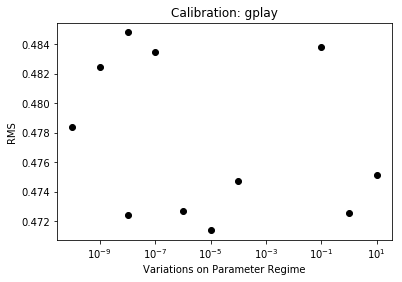

In [2]:
var_param_gplay = [0.0000000001, 0.000000001, 0.00000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.] # 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 5.0]
change_MAX_NUM_ITERATIONS = 50
change_SIGMOID_APPROX_ERROR = 10.0**(-6)
change_QUANTISATION_UNCERTY = 10.0**(-4)

savetopath = './calibrations_data/'
testcase_ID = 'gplay'
var_err_gplay = np.zeros(len(var_param_gplay))
plt.figure()

for idx_var in range(len(var_param_gplay)):
    risk_map = 0.
    vardict = copy.deepcopy(GLOBALDICT)
    vardict["NOISEPARAMS"]["QUANTISATION_UNCERTY"]["SIGMA"] = change_QUANTISATION_UNCERTY #var_param_gplay[idx_var]
    vardict["MODELDESIGN"]["MAX_NUM_ITERATIONS"] = change_MAX_NUM_ITERATIONS
    vardict["NOISEPARAMS"]["SIGMOID_APPROX_ERROR"]["SIGMA"] = var_param_gplay[idx_var] #change_SIGMOID_APPROX_ERROR
    vardict["MODELDESIGN"]["ID"] = savetopath + testcase_ID + '_v_' + str(idx_var + 1)
    risk_map = riskqslam(truthtype='Gaussian', **vardict)
    
    try:
        risk_map.naive_implementation(randomise='OFF')
        print "Variation ", idx_var + 1, "successful." 
        ydata = np.asarray(risk_map.macro_residuals)
        var_err_gplay[idx_var] = (1.0/ np.sqrt(ydata.shape[2]))*np.mean(np.linalg.norm(ydata[0,:,:], axis=1), axis=0)
        plt.plot(var_param_gplay[idx_var], var_err_gplay[idx_var], 'ko')
    except :
        print "Variation ", idx_var + 1, "was not completed"

plt.title('Calibration: ' + testcase_ID)
plt.ylabel('RMS')
plt.xlabel('Variations on Parameter Regime')
plt.xscale('log')
# plt.ylim([0, 1])
plt.show()  

#### Calibration Run: G1

Variation  1 successful.
Variation  2 successful.
Variation  3 was not completed
Variation  4 was not completed
Variation  5 successful.
Variation  6 successful.
Variation  7 successful.
Variation  8 successful.


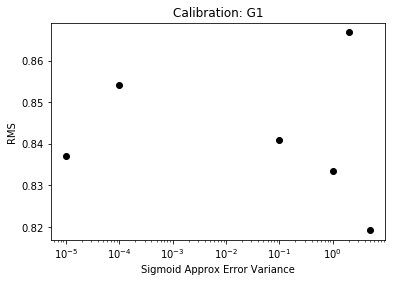

In [3]:
var_param_g1 = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 5.0]

savetopath = './calibrations_data/'
testcase_ID = 'G1'
var_err_g1 = np.zeros(len(var_param_g1))
plt.figure()

for idx_var in range(len(var_param_g1)):
    risk_map = 0.
    vardict = copy.deepcopy(GLOBALDICT)
    vardict["NOISEPARAMS"]["SIGMOID_APPROX_ERROR"]["SIGMA"] = var_param_g1[idx_var]
    vardict["MODELDESIGN"]["ID"] = savetopath + testcase_ID + '_v_' + str(idx_var + 1)
    risk_map = riskqslam(truthtype='Gaussian', **vardict)
    
    try:
        risk_map.naive_implementation(randomise='OFF')
        print "Variation ", idx_var + 1, "successful." 
        ydata = np.asarray(risk_map.macro_residuals)
        var_err_g1[idx_var] = (1.0/ np.sqrt(ydata.shape[2]))*np.mean(np.linalg.norm(ydata[0,:,:], axis=1), axis=0)
        plt.plot(var_param_g1[idx_var], var_err_g1[idx_var], 'ko')
    except :
        print "Variation ", idx_var + 1, "was not completed"

plt.title('Calibration: ' + testcase_ID)
plt.ylabel('RMS')
plt.xlabel('Sigmoid Approx Error Variance')
plt.xscale('log')
# plt.ylim([0, 1])
plt.show()  

#### Calibration Run: G2

Variation  1 successful.
Variation  2 successful.
Variation  3 successful.
Variation  4 successful.
Variation  5 successful.
Variation  6 successful.
Variation  7 successful.
Variation  8 successful.
Variation  9 successful.
Variation  10 successful.
Variation  11 successful.


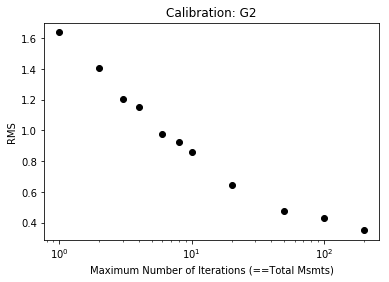

In [4]:
var_param_g2 = [1, 2, 3, 4, 6, 8, 10, 20, 50, 100, 200]
savetopath = './calibrations_data/'
testcase_ID = 'G2'
var_err_g2 = np.zeros(len(var_param_g2))
plt.figure()

for idx_var in range(len(var_param_g2)):
    risk_map = 0.
    vardict = copy.deepcopy(GLOBALDICT)
    vardict["MODELDESIGN"]["MAX_NUM_ITERATIONS"] = var_param_g2[idx_var]
    vardict["MODELDESIGN"]["ID"] = savetopath + testcase_ID + '_v_' + str(idx_var + 1)
    risk_map = riskqslam(truthtype='Gaussian', **vardict)
    
    try:
        risk_map.naive_implementation(randomise='OFF')
        print "Variation ", idx_var + 1, "successful." 
        ydata = np.asarray(risk_map.macro_residuals)
        var_err_g2[idx_var] = (1.0/ np.sqrt(ydata.shape[2]))*np.mean(np.linalg.norm(ydata[0,:,:], axis=1), axis=0)
        plt.plot(var_param_g2[idx_var], var_err_g2[idx_var], 'ko')
    except :
        print "Variation ", idx_var + 1, "was not completed"

plt.title('Calibration: ' + testcase_ID)
plt.ylabel('RMS')
plt.xlabel('Maximum Number of Iterations (==Total Msmts)')
plt.xscale('log')
# plt.ylim([0, 1])
plt.show()  

#### Calibration Run: G3

Variation  1 successful.
Variation  2 successful.
Variation  3 successful.
Variation  4 successful.
Variation  5 successful.
Variation  6 successful.
Variation  7 successful.
Variation  8 successful.
Variation  9 successful.
Variation  10 successful.
Variation  11 successful.


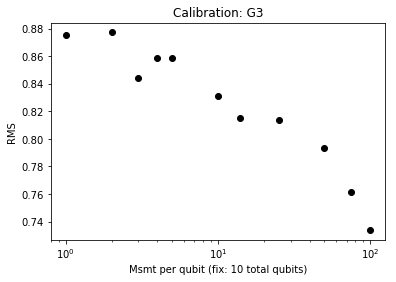

In [5]:
var_param_g3 = [1, 2, 3, 4, 5, 10, 14, 25, 50, 75, 100]
savetopath = './calibrations_data/'
testcase_ID = 'G3'
var_err_g3 = np.zeros(len(var_param_g3))
plt.figure()

for idx_var in range(len(var_param_g3)):
    risk_map = 0.
    vardict = copy.deepcopy(GLOBALDICT)
    vardict["MODELDESIGN"]["MSMTS_PER_NODE"] = var_param_g3[idx_var]
    vardict["MODELDESIGN"]["ID"] = savetopath + testcase_ID + '_v_' + str(idx_var + 1)
    risk_map = riskqslam(truthtype='Gaussian', **vardict)
    
    try:
        risk_map.naive_implementation(randomise='OFF')
        print "Variation ", idx_var + 1, "successful." 
        ydata = np.asarray(risk_map.macro_residuals)
        var_err_g3[idx_var] = (1.0/ np.sqrt(ydata.shape[2]))*np.mean(np.linalg.norm(ydata[0,:,:], axis=1), axis=0)
        plt.plot(var_param_g3[idx_var], var_err_g3[idx_var], 'ko')
    except :
        print "Variation ", idx_var + 1, "was not completed"

plt.title('Calibration: ' + testcase_ID)
plt.ylabel('RMS')
plt.xlabel('Msmt per qubit (fix: 10 total qubits)')
plt.xscale('log')
# plt.ylim([0, 1])
plt.show()  

#### Calibration Run: G4

Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Control List empty; randomly chosen qubit on grid.
Variation  1 successful.
Contro

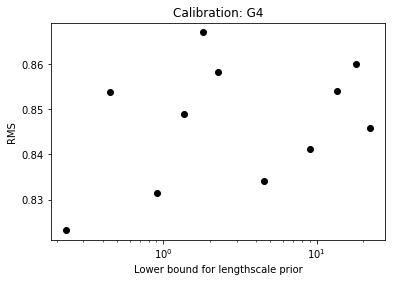

In [6]:
var_param_g4 = [0.23, 0.45, 0.91, 1.36, 1.81, 2.26, 4.53, 9.05, 13.58, 18.10, 22.40]
savetopath = './calibrations_data/'
testcase_ID = 'G4'
var_err_g4 = np.zeros(len(var_param_g4))
plt.figure()

for idx_var in range(len(var_param_g4)):
    risk_map = 0.
    vardict = copy.deepcopy(GLOBALDICT)
    vardict["MODELDESIGN"]["MULTIPLER_R_MIN"] = var_param_g4[idx_var]
    vardict["MODELDESIGN"]["ID"] = savetopath + testcase_ID + '_v_' + str(idx_var + 1)
    risk_map = riskqslam(truthtype='Gaussian', **vardict)
    
    try:
        risk_map.naive_implementation(randomise='OFF')
        print "Variation ", idx_var + 1, "successful." 
        ydata = np.asarray(risk_map.macro_residuals)
        var_err_g4[idx_var] = (1.0/ np.sqrt(ydata.shape[2]))*np.mean(np.linalg.norm(ydata[0,:,:], axis=1), axis=0)
        plt.plot(var_param_g4[idx_var], var_err_g4[idx_var], 'ko')
    except :
        print "Variation ", idx_var + 1, "was not completed"

plt.title('Calibration: ' + testcase_ID)
plt.ylabel('RMS')
plt.xlabel('Lower bound for lengthscale prior')
plt.xscale('log')
# plt.ylim([0, 1])
plt.show()  

#### Calibration Run: G5

Variation  1 successful.
Variation  2 successful.
Variation  3 successful.
Variation  4 successful.
Variation  5 successful.
Variation  6 successful.
Variation  7 successful.
Variation  8 successful.
Variation  9 successful.
Variation  10 successful.
Variation  11 successful.
Variation  12 successful.
Variation  13 successful.
Variation  14 successful.


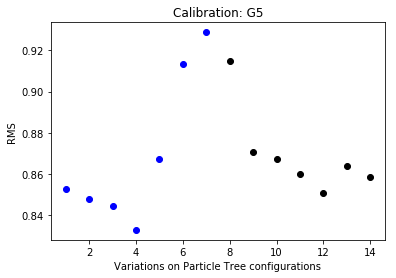

In [7]:
c5_alpha = [5, 5, 5, 5, 5, 5, 5, 1, 2, 3, 4, 5, 10, 20]
c5_beta =  [2, 4, 6, 7, 10, 20, 40, 10, 10, 10, 10, 10, 10, 10]


var_param_g5 = zip(c5_alpha, c5_beta)
savetopath = './calibrations_data/'
testcase_ID = 'G5'
var_err_g5 = np.zeros(len(var_param_g5))
plt.figure()

for idx_var in range(len(var_param_g5)):
    risk_map = 0.
    vardict = copy.deepcopy(GLOBALDICT)
    vardict["MODELDESIGN"]["P_ALPHA"] = var_param_g5[idx_var][0]
    vardict["MODELDESIGN"]["P_BETA"] = var_param_g5[idx_var][1]
    vardict["MODELDESIGN"]["ID"] = savetopath + testcase_ID + '_v_' + str(idx_var + 1)
    risk_map = riskqslam(truthtype='Gaussian', **vardict)
    
    try:
        risk_map.naive_implementation(randomise='OFF')
        print "Variation ", idx_var + 1, "successful." 
        ydata = np.asarray(risk_map.macro_residuals)
        var_err_g5[idx_var] = (1.0/ np.sqrt(ydata.shape[2]))*np.mean(np.linalg.norm(ydata[0,:,:], axis=1), axis=0)
        if idx_var + 1 > 7 :
            plt.plot(idx_var + 1, var_err_g5[idx_var], 'ko')
        if idx_var + 1 <= 7 :
            plt.plot(idx_var + 1, var_err_g5[idx_var], 'bo')
    except :
        print "Variation ", idx_var + 1, "was not completed"

plt.title('Calibration: ' + testcase_ID)
plt.ylabel('RMS')
plt.xlabel('Variations on Particle Tree configurations')
# plt.ylim([0, 1])
plt.show()  

#### Calibration Run: G6

Variation  1 successful.
Variation  2 successful.
Variation  3 successful.
Variation  4 successful.
Variation  5 successful.
Variation  6 successful.
Variation  7 successful.
Variation  8 successful.
Variation  9 successful.
Variation  10 successful.
Variation  11 successful.


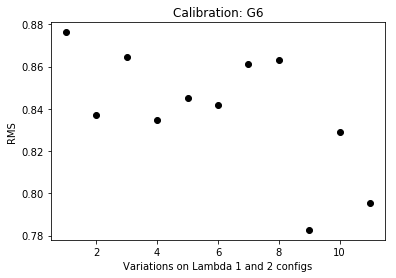

In [8]:
c6_lambda1 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.996, 0.99, 0.82, 0.965, 0.0]
c6_lambda2 = [1.0, 0.998, 0.9955, 0.993, 0.99, 0.9864, 0.982, 0.977, 0.968, 0.956, 0.0]


var_param_g6 = zip(c6_lambda1, c6_lambda2)
savetopath = './calibrations_data/'
testcase_ID = 'G6'
var_err_g6 = np.zeros(len(var_param_g6))
plt.figure()

for idx_var in range(len(var_param_g6)):
    risk_map = 0.
    vardict = copy.deepcopy(GLOBALDICT)
    vardict["MODELDESIGN"]["LAMBDA_1"] = var_param_g6[idx_var][0]
    vardict["MODELDESIGN"]["LAMBDA_2"] = var_param_g6[idx_var][1]
    vardict["MODELDESIGN"]["ID"] = savetopath + testcase_ID + '_v_' + str(idx_var + 1)
    risk_map = riskqslam(truthtype='Gaussian', **vardict)
    
    try:
        risk_map.naive_implementation(randomise='OFF')
        print "Variation ", idx_var + 1, "successful." 
        ydata = np.asarray(risk_map.macro_residuals)
        var_err_g6[idx_var] = (1.0/ np.sqrt(ydata.shape[2]))*np.mean(np.linalg.norm(ydata[0,:,:], axis=1), axis=0)
        plt.plot(idx_var + 1, var_err_g6[idx_var], 'ko')
    except :
        print "Variation ", idx_var + 1, "was not completed"

plt.title('Calibration: ' + testcase_ID)
plt.ylabel('RMS')
plt.xlabel('Variations on Lambda 1 and 2 configs')
# plt.ylim([0, 1])
plt.show()  